In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import plotly.graph_objects as go

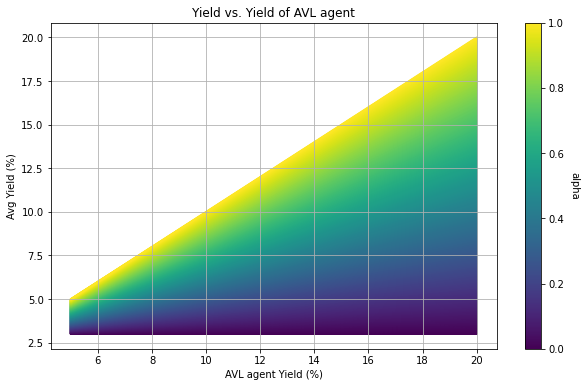

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm


y_E = 0.03  # 3%


y_A_values = np.linspace(0.05, 0.20, 500)  


alpha_values = np.linspace(0, 1, 500) 

Y_A, Alpha = np.meshgrid(y_A_values, alpha_values)


Y = y_E + (Y_A - y_E) * Alpha


Y_A_flat = Y_A.flatten()
Y_flat = Y.flatten()
Alpha_flat = Alpha.flatten()


norm = Normalize(vmin=0, vmax=1)
cmap = cm.viridis

plt.figure(figsize=(10, 6))
scatter = plt.scatter(Y_A_flat * 100, Y_flat * 100, c=Alpha_flat, cmap=cmap, s=1)


cbar = plt.colorbar(scatter)
cbar.set_label('alpha', rotation=270, labelpad=15)


plt.xlabel('AVL agent Yield (%)')
plt.ylabel('Avg Yield (%)')
plt.title('Yield vs. Yield of AVL agent')


plt.grid(True)


plt.show()


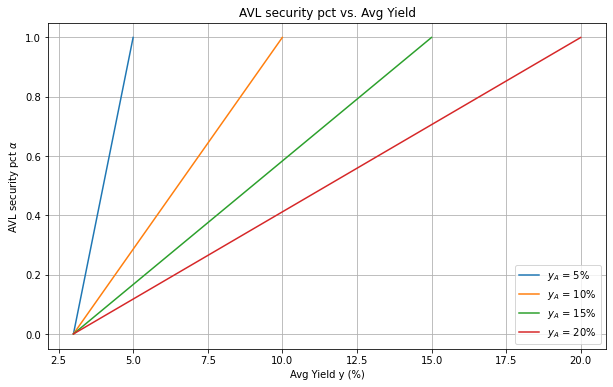

In [3]:
y_A_list = [0.05, 0.10, 0.15, 0.20]  # 5%, 10%, 15%, 20%

alpha_values = np.linspace(0, 1, 500)  # 从 0 到 1，共500个点

plt.figure(figsize=(10, 6))


for y_A in y_A_list:
    y_values = y_E + (y_A - y_E) * alpha_values
    
    plt.plot(y_values * 100, alpha_values, label=f'$y_A$ = {y_A * 100:.0f}%')

plt.xlabel('Avg Yield y (%)')
plt.ylabel('AVL security pct $\\alpha$')
plt.title('AVL security pct vs. Avg Yield')

plt.legend()

plt.grid(True)

plt.show()


Font 'default' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff09' [U+ff09], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff08' [U+ff08], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uff09' [U+ff09], substituting with a dummy symbol.


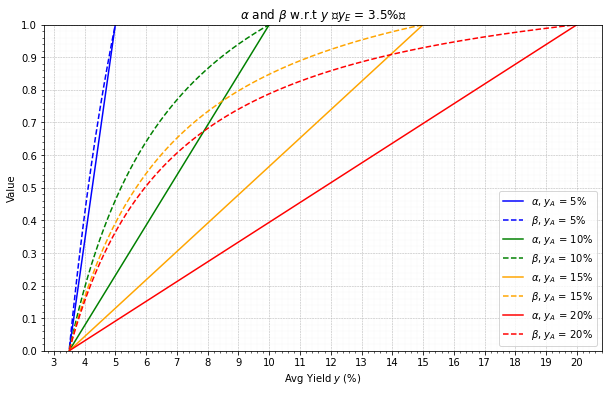

In [20]:
def plot_alpha_beta(eth_yield=0.035):
    """
    Plots alpha and beta values with respect to average yield for different AVL yields
    
    Args:
        eth_yield (float): ETH yield percentage (default: 0.035)
    """
    # AVL yield cases to plot
    y_A_list = [0.05, 0.10, 0.15, 0.20]  
    
    # Calculate y value range
    y_min = eth_yield + 0.0001
    y_max = max(y_A_list) - 0.0001
    
    # Create more granular y_values
    y_values = np.linspace(y_min, y_max, 1000)  # Increased from 500 to 1000 points
    
    # Color scheme for different AVL yields
    colors = ['blue', 'green', 'orange', 'red']
    
    # Create plot
    plt.figure(figsize=(10, 6))
    
    # Plot for each AVL yield case
    for idx, y_A in enumerate(y_A_list):
        # Calculate alpha and beta values
        alpha_values = (y_values - eth_yield) / (y_A - eth_yield)
        beta_values = y_A * alpha_values / y_values
        
        # Plot alpha and beta
        plt.plot(y_values * 100, alpha_values, color=colors[idx], linestyle='-', 
                 label=f'$\\alpha$, $y_A$ = {y_A * 100:.0f}%')
        plt.plot(y_values * 100, beta_values, color=colors[idx], linestyle='--', 
                 label=f'$\\beta$, $y_A$ = {y_A * 100:.0f}%')
    
    # Add labels and title
    plt.xlabel('Avg Yield $y$ (%)')
    plt.ylabel('Value')
    plt.title(f'$\\alpha$ and $\\beta$ w.r.t $y$ （$y_E$ = {eth_yield*100:.1f}%）')
    
    # Add finer grid and ticks
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.2, alpha=0.5)
    
    # Add y-axis ticks every 0.1 (10%)
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # Add x-axis ticks every 1%
    plt.xticks(np.arange(int(eth_yield*100), 21, 1))
    
    # Add legend and set y-axis limits
    plt.legend()
    plt.ylim(0, 1)
    
    plt.show()

plot_alpha_beta(eth_yield=0.035)

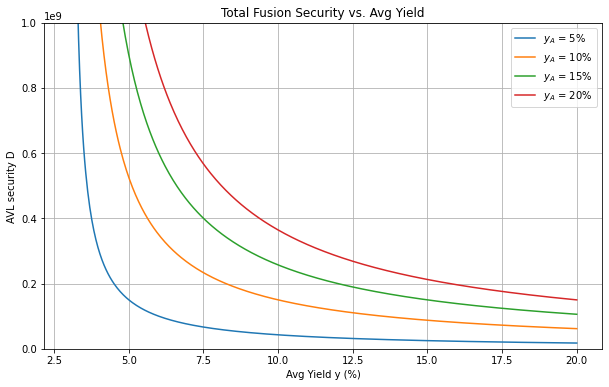

In [5]:
avl_price = 0.1
FDV = 10000000000 * avl_price
alpha_D = 0.15 * FDV  
y_E = 0.03  

y_A_list = [0.05, 0.10, 0.15, 0.20]

y_min = y_E + 0.0001
y_max = max(y_A_list)
y_values = np.linspace(y_min, y_max, 500)

plt.figure(figsize=(10, 6))

for y_A in y_A_list:
    numerator = alpha_D * (y_A - y_E)
    denominator = y_values - y_E
    D_values = numerator / denominator

    plt.plot(y_values * 100, D_values, label=f'$y_A$ = {y_A * 100:.0f}%')

plt.xlabel('Avg Yield y (%)')
plt.ylabel('AVL security D')
plt.title('Total Fusion Security vs. Avg Yield')

plt.legend()

plt.grid(True)

# y axis limits
plt.ylim(0, FDV)

plt.show()

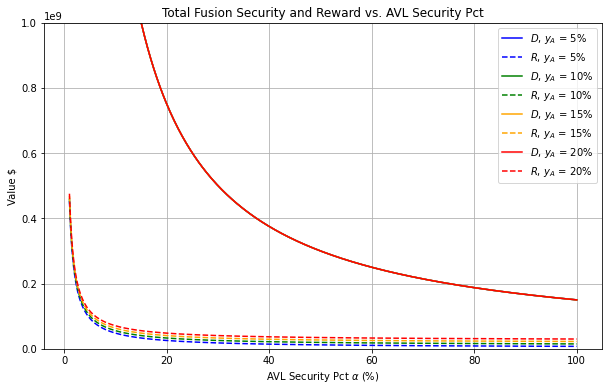

In [24]:
avl_price = 0.1
FDV = 10000000000 * avl_price
k = 0.15 * FDV  # αD = 15% * FDV
y_E = 0.03  # y_E = 3%
y_A_list = [0.05, 0.10, 0.15, 0.20]  # y_A = 5%, 10%, 15%, 20%

y_min = y_E + 0.0001
y_max = max(y_A_list) - 0.0001
alpha_values = np.linspace(0.01, 1.0, 500)


plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']

for idx, y_A in enumerate(y_A_list):
    y_values = alpha_values * y_A + (1 - alpha_values) * y_E
    D_values = k / alpha_values
    R_values = D_values * y_values
    
    plt.plot(alpha_values * 100, D_values, color=colors[idx], linestyle='-', label=f'$D$, $y_A$ = {y_A * 100:.0f}%')
    plt.plot(alpha_values * 100, R_values, color=colors[idx], linestyle='--', label=f'$R$, $y_A$ = {y_A * 100:.0f}%')


plt.xlabel('AVL Security Pct $\\alpha$ (%)')
plt.ylabel('Value $')
plt.title('Total Fusion Security and Reward vs. AVL Security Pct')

plt.legend()


plt.grid(True)

plt.ylim(0, FDV)
plt.show()


In [22]:
y_values = alpha_values * y_A + (1 - alpha_values) * y_E
print(D_values)

[1.50000000e+10 1.25167224e+10 1.07388809e+10 9.40326633e+09
 8.36312849e+09 7.53018109e+09 6.84812443e+09 6.27936242e+09
 5.79783114e+09 5.38489209e+09 5.02686367e+09 4.71347607e+09
 4.43687018e+09 4.19092945e+09 3.97082228e+09 3.77268145e+09
 3.59337494e+09 3.43033914e+09 3.28145550e+09 3.14495798e+09
 3.01936265e+09 2.90341350e+09 2.79604034e+09 2.69632565e+09
 2.60347826e+09 2.51681237e+09 2.43573056e+09 2.35970996e+09
 2.28829104e+09 2.22106825e+09 2.15768233e+09 2.09781390e+09
 2.04117807e+09 1.98751992e+09 1.93661061e+09 1.88824420e+09
 1.84223480e+09 1.79841422e+09 1.75662990e+09 1.71674312e+09
 1.67862749e+09 1.64216762e+09 1.60725789e+09 1.57380151e+09
 1.54170958e+09 1.51090028e+09 1.48129824e+09 1.45283385e+09
 1.42544277e+09 1.39906542e+09 1.37364654e+09 1.34913482e+09
 1.32548256e+09 1.30264532e+09 1.28058169e+09 1.25925303e+09
 1.23862320e+09 1.21865842e+09 1.19932703e+09 1.18059937e+09
 1.16244759e+09 1.14484552e+09 1.12776857e+09 1.11119359e+09
 1.09509876e+09 1.079463

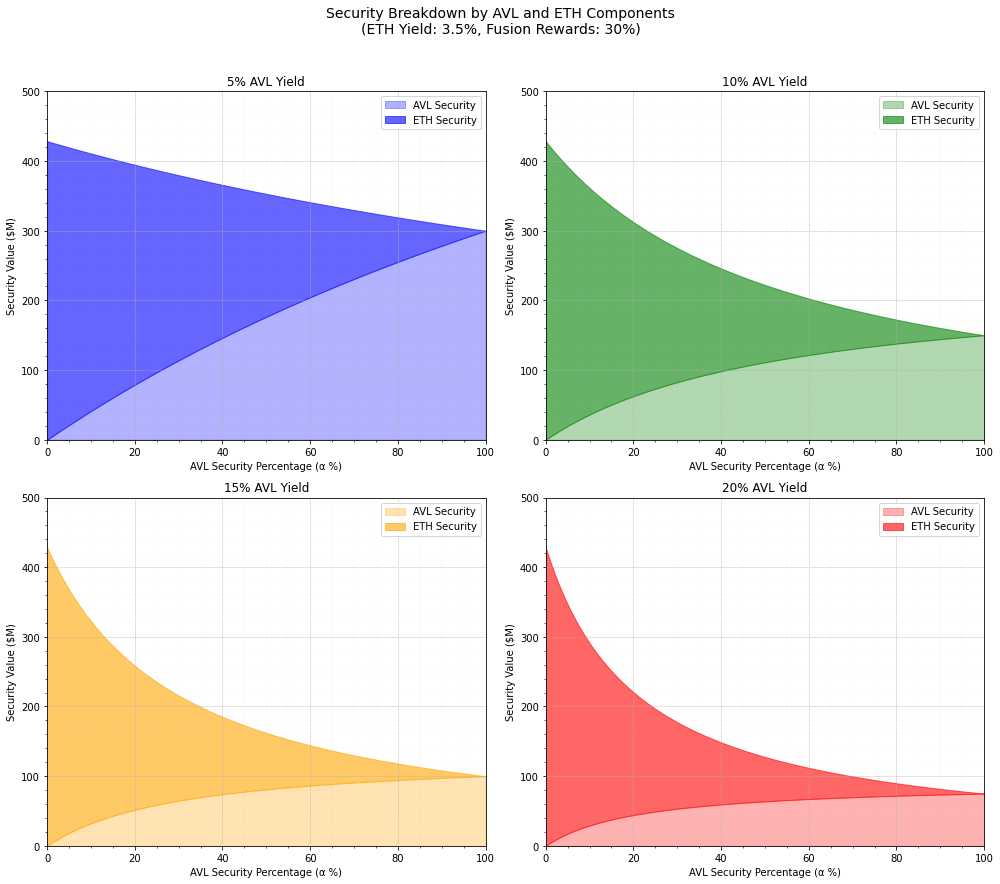

In [27]:
def plot_security_breakdown(eth_yield=0.035, total_supply=10e9, avl_price=0.1, 
                           inflation_rate=0.05, fusion_rewards_pct=0.30):
    """
    Plots stacked area curves in 2x2 layout showing AVL and ETH security breakdown
    
    Args:
        eth_yield (float): ETH yield percentage (default: 0.035)
        total_supply (float): Total supply of AVL tokens (default: 10e9)
        avl_price (float): Price per AVL token in USD (default: 0.1)
        inflation_rate (float): Annual inflation rate (default: 0.05)
        fusion_rewards_pct (float): Percentage of rewards allocated to fusion (default: 0.30)
    """
    # AVL yield cases to plot
    avl_yields = [0.05, 0.10, 0.15, 0.20]
    colors = ['blue', 'green', 'orange', 'red']
    titles = ['5% AVL Yield', '10% AVL Yield', '15% AVL Yield', '20% AVL Yield']
    
    # Create figure and subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()  # Flatten to 1D array for easier iteration
    
    # Alpha values from 0% to 100%
    alpha_values = np.linspace(0, 1, 500)
    
    # Plot for each AVL yield case
    for idx, (avl_yield, color, title) in enumerate(zip(avl_yields, colors, titles)):
        ax = axes[idx]
        
        # Calculate average yield
        avg_yield = alpha_values * avl_yield + (1 - alpha_values) * eth_yield
        
        # Calculate total security
        total_security = (fusion_rewards_pct * total_supply * avl_price * inflation_rate) / avg_yield
        
        # Calculate AVL and ETH security components
        avl_security = total_security * alpha_values
        eth_security = total_security * (1 - alpha_values)
        
        # Plot stacked areas
        ax.fill_between(alpha_values * 100, 0, avl_security / 1e6, 
                       color=color, alpha=0.3, label='AVL Security')
        ax.fill_between(alpha_values * 100, avl_security / 1e6, total_security / 1e6,
                       color=color, alpha=0.6, label='ETH Security')
        
        # Add subplot title and labels
        ax.set_title(title)
        ax.set_xlabel('AVL Security Percentage (α %)')
        ax.set_ylabel('Security Value ($M)')
        
        # Add grid and legend
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.minorticks_on()
        ax.grid(True, which='minor', linestyle=':', linewidth=0.2, alpha=0.5)
        ax.legend()
        
        # Set axis limits
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 500)  # Adjust based on your security range
    
    # Add main title
    fig.suptitle(f'Security Breakdown by AVL and ETH Components\n'
                f'(ETH Yield: {eth_yield*100:.1f}%, Fusion Rewards: {fusion_rewards_pct*100:.0f}%)',
                y=1.02, fontsize=14)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


plot_security_breakdown(eth_yield=0.035, total_supply=10e9, avl_price=0.1, 
                       inflation_rate=0.05, fusion_rewards_pct=0.30)

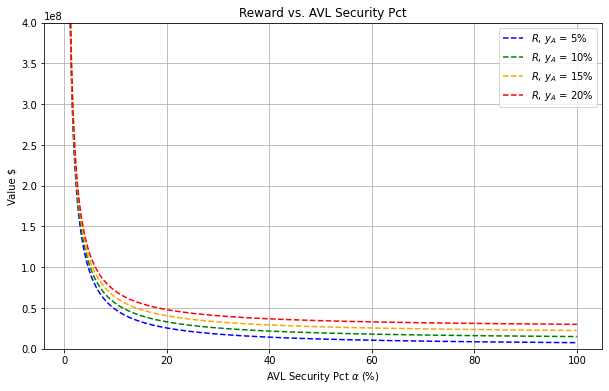

In [26]:
avl_price = 0.1
FDV = 10000000000 * avl_price
k = 0.15 * FDV  # αD = 15% * FDV
y_E = 0.03  # y_E = 3%
y_A_list = [0.05, 0.10, 0.15, 0.20]  # y_A = 5%, 10%, 15%, 20%

y_min = y_E + 0.0001
y_max = max(y_A_list) - 0.0001
alpha_values = np.linspace(0.01, 1.0, 500)


plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']

for idx, y_A in enumerate(y_A_list):
    y_values = alpha_values * y_A + (1 - alpha_values) * y_E
    D_values = k / alpha_values
    R_values = D_values * y_values
    
    #plt.plot(alpha_values * 100, D_values, color=colors[idx], linestyle='-', label=f'$D$, $y_A$ = {y_A * 100:.0f}%')
    plt.plot(alpha_values * 100, R_values, color=colors[idx], linestyle='--', label=f'$R$, $y_A$ = {y_A * 100:.0f}%')


plt.xlabel('AVL Security Pct $\\alpha$ (%)')
plt.ylabel('Value $')
plt.title('Reward vs. AVL Security Pct')

plt.legend()


plt.grid(True)

plt.ylim(0, 0.4*FDV)
plt.show()

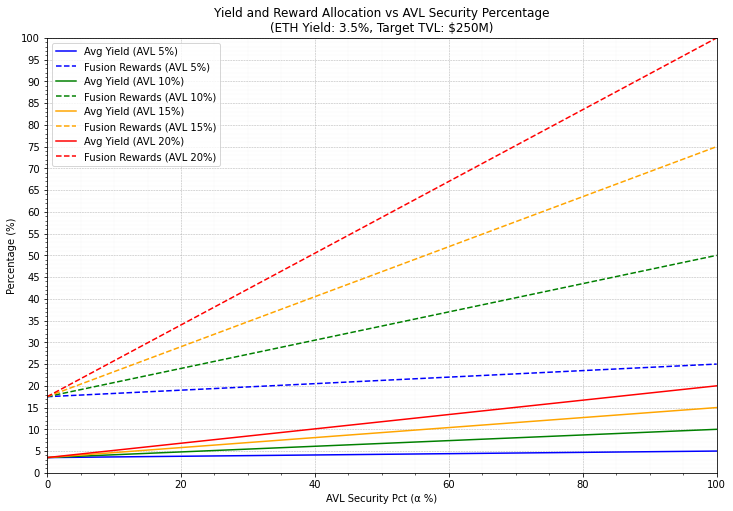

In [16]:
def plot_yield_and_fusion_rewards(target_TVL, eth_yield=0.035, total_supply=10e9, 
                                 avl_price=0.1, inflation_rate=0.05):
    """
    Plots yield and fusion rewards for multiple AVL yield cases
    
    Args:
        target_TVL (float): Target Total Value Locked
        eth_yield (float): ETH yield percentage (default: 0.035)
        total_supply (float): Total supply of AVL tokens (default: 10e9)
        avl_price (float): Price per AVL token in USD (default: 0.1)
        inflation_rate (float): Annual inflation rate (default: 0.05)
    """
    # AVL yield cases to plot
    avl_yields = [0.05, 0.10, 0.15, 0.20]
    colors = ['blue', 'green', 'orange', 'red']
    
    # Alpha values from 0% to 100%
    alpha_values = np.linspace(0, 1, 500)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot for each AVL yield case
    for avl_yield, color in zip(avl_yields, colors):
        # Calculate average yield
        avg_yield = alpha_values * avl_yield + (1 - alpha_values) * eth_yield
        
        # Calculate % of Rewards Allocated to Fusion
        fusion_rewards_pct = (target_TVL * avg_yield) / (total_supply * avl_price * inflation_rate)
        
        # Plot average yield
        plt.plot(alpha_values * 100, avg_yield * 100, color=color,
                linestyle='-', label=f'Avg Yield (AVL {avl_yield*100:.0f}%)')
        
        # Plot % of Rewards Allocated to Fusion
        plt.plot(alpha_values * 100, fusion_rewards_pct * 100, color=color,
                linestyle='--', label=f'Fusion Rewards (AVL {avl_yield*100:.0f}%)')
    
    # Add labels and title
    plt.xlabel('AVL Security Pct (α %)')
    plt.ylabel('Percentage (%)')
    plt.title('Yield and Reward Allocation vs AVL Security Percentage\n'
             f'(ETH Yield: {eth_yield*100:.1f}%, Target TVL: ${target_TVL/1e6:.0f}M)')
    
    # Add legend and grid
    plt.legend()
    
    # Set axis limits and grid
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    
    # Add finer grid and y-axis ticks
    plt.yticks(np.arange(0, 101, 5))  # Ticks every 5%
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.2, alpha=0.5)
    
    plt.show()

plot_yield_and_fusion_rewards(250e6, eth_yield=0.035, total_supply=10e9, 
                                 avl_price=0.1, inflation_rate=0.05)

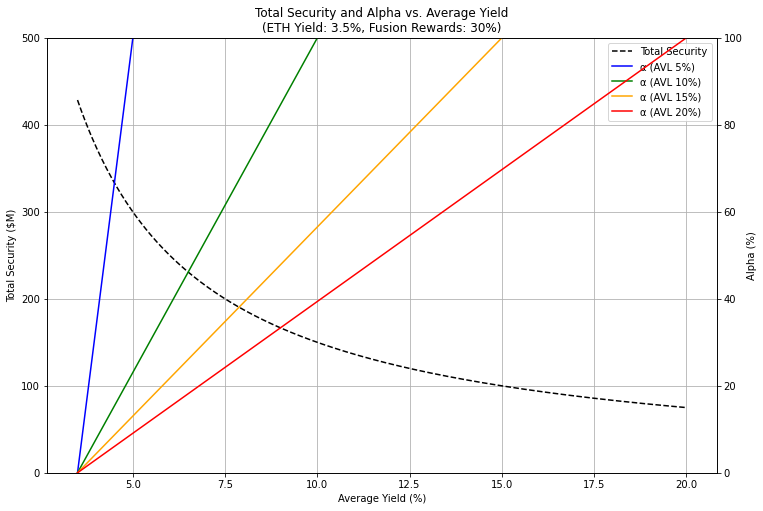

In [14]:
def plot_security_and_alpha(eth_yield=0.035, total_supply=10e9, 
                           avl_price=0.1, inflation_rate=0.05,
                           fusion_rewards_pct=0.30):

    # AVL yield cases to plot
    avl_yields = [0.05, 0.10, 0.15, 0.20]
    colors = ['blue', 'green', 'orange', 'red']
    
    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(12, 8))
    
    # Create secondary axis
    ax2 = ax1.twinx()
    
    # Plot total security once (same for all cases)
    alpha_values = np.linspace(0, 1, 500)
    avg_yield = alpha_values * 0.2 + (1 - alpha_values) * eth_yield  # Using middle case for reference
    total_security = (total_supply * avl_price * inflation_rate * 
                     fusion_rewards_pct) / avg_yield
    ax1.plot(avg_yield * 100, total_security / 1e6, '--', color='black',
            label='Total Security')
    
    # Plot alpha for each AVL yield case
    for avl_yield, color in zip(avl_yields, colors):
        # Calculate average yield
        avg_yield = alpha_values * avl_yield + (1 - alpha_values) * eth_yield
        
        # Calculate alpha
        alpha_calc = (avg_yield - eth_yield) / (avl_yield - eth_yield)
        
        # Plot alpha (solid line)
        ax2.plot(avg_yield * 100, alpha_calc * 100, '-', color=color,
                label=f'α (AVL {avl_yield*100:.0f}%)')
    
    # Set labels and title
    ax1.set_xlabel('Average Yield (%)')
    ax1.set_ylabel('Total Security ($M)', color='black')
    ax2.set_ylabel('Alpha (%)', color='black')
    plt.title('Total Security and Alpha vs. Average Yield\n'
             f'(ETH Yield: {eth_yield*100:.1f}%, Fusion Rewards: {fusion_rewards_pct*100:.0f}%)')
    
    # Set axis limits
    ax1.set_ylim(0, 500)  # Adjust based on your security range
    ax2.set_ylim(0, 100)
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    # Add grid
    ax1.grid(True)
    
    plt.show()

plot_security_and_alpha(eth_yield=0.035, total_supply=10e9, 
                           avl_price=0.1, inflation_rate=0.05,
                           fusion_rewards_pct=0.30)

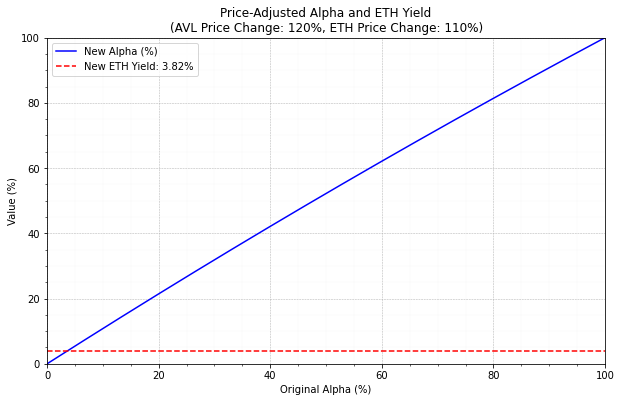

In [28]:
def plot_price_adjusted_alpha_yield(eth_yield=0.035, avl_price_change_pct=1.2, eth_price_change_pct=1.1):
    """
    Plots new alpha and ETH yield based on price changes of AVL and ETH
    
    Args:
        eth_yield (float): Initial ETH yield percentage (default: 0.035)
        avl_price_change_pct (float): AVL price change percentage (default: 1.2)
        eth_price_change_pct (float): ETH price change percentage (default: 1.1)
    """
    # Alpha values from 0% to 100%
    alpha_values = np.linspace(0, 1, 500)
    
    # Calculate intermediate output and new alpha
    intermediate_output = (1 - alpha_values) * (np.log(avl_price_change_pct) - np.log(eth_price_change_pct))
    new_alpha = np.exp(intermediate_output) * alpha_values
    
    # Calculate new ETH yield
    new_eth_yield = eth_yield * (avl_price_change_pct / eth_price_change_pct)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot new alpha
    plt.plot(alpha_values * 100, new_alpha * 100, 'b-', label='New Alpha (%)')
    
    # Plot new ETH yield as horizontal line
    plt.axhline(y=new_eth_yield * 100, color='r', linestyle='--', 
                label=f'New ETH Yield: {new_eth_yield*100:.2f}%')
    
    # Add labels and title
    plt.xlabel('Original Alpha (%)')
    plt.ylabel('Value (%)')
    plt.title(f'Price-Adjusted Alpha and ETH Yield\n'
             f'(AVL Price Change: {avl_price_change_pct*100:.0f}%, '
             f'ETH Price Change: {eth_price_change_pct*100:.0f}%)')
    
    # Add grid and legend
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.2, alpha=0.5)
    plt.legend()
    
    # Set axis limits
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    
    plt.show()

plot_price_adjusted_alpha_yield(eth_yield=0.035, avl_price_change_pct=1.2, eth_price_change_pct=1.1)

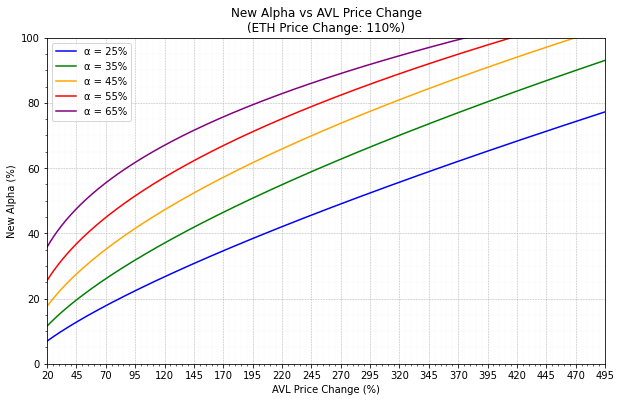

In [33]:
def plot_alpha_vs_avl_price(eth_yield=0.035, eth_price_change_pct=1.1):
    """
    Plots new alpha vs AVL price change for multiple alpha cases
    
    Args:
        eth_yield (float): Initial ETH yield percentage (default: 0.035)
        eth_price_change_pct (float): ETH price change percentage (default: 1.1)
    """
    # Alpha cases to plot
    alpha_cases = [0.25, 0.35, 0.45, 0.55, 0.65]
    colors = ['blue', 'green', 'orange', 'red', 'purple']
    
    # AVL price change range from 50% to 200%
    avl_price_changes = np.linspace(0.2, 5.0, 500)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot for each alpha case
    for alpha, color in zip(alpha_cases, colors):
        # Calculate intermediate output and new alpha
        intermediate_output = (1 - alpha) * (np.log(avl_price_changes) - np.log(eth_price_change_pct))
        new_alpha = np.exp(intermediate_output) * alpha
        
        # Plot new alpha vs AVL price change
        plt.plot(avl_price_changes * 100, new_alpha * 100, color=color,
                label=f'α = {alpha*100:.0f}%')
    
    # Add labels and title
    plt.xlabel('AVL Price Change (%)')
    plt.ylabel('New Alpha (%)')
    plt.title(f'New Alpha vs AVL Price Change\n'
             f'(ETH Price Change: {eth_price_change_pct*100:.0f}%)')
    
    # Add grid and legend
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.2, alpha=0.5)
    plt.legend()
    
    # Set axis limits
    plt.xlim(50, 200)
    plt.ylim(0, 100)
    
    # Add x-axis ticks every 25% for cleaner layout
    plt.xticks(np.arange(20, 501, 25))
    
    plt.show()


plot_alpha_vs_avl_price(eth_yield=0.035, eth_price_change_pct=1.1)

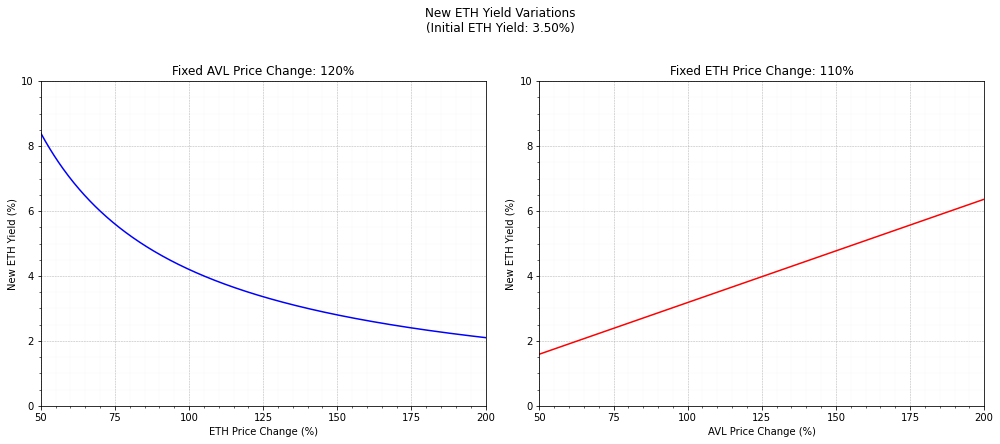

In [36]:
def plot_eth_yield_variations(eth_yield=0.035, fixed_avl_pct=1.2, fixed_eth_pct=1.1):
    """
    Plots new ETH yield in 1x2 layout with fixed AVL and ETH price changes
    
    Args:
        eth_yield (float): Initial ETH yield percentage (default: 0.035)
        fixed_avl_pct (float): Fixed AVL price change percentage (default: 1.2)
        fixed_eth_pct (float): Fixed ETH price change percentage (default: 1.1)
    """
    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Price change ranges
    eth_price_changes = np.linspace(0.5, 2.0, 500)
    avl_price_changes = np.linspace(0.5, 2.0, 500)
    
    # Plot 1: Fixed AVL price, varying ETH price
    new_eth_yield_1 = eth_yield * fixed_avl_pct / eth_price_changes
    ax1.plot(eth_price_changes * 100, new_eth_yield_1 * 100, 'b-')
    ax1.set_xlabel('ETH Price Change (%)')
    ax1.set_ylabel('New ETH Yield (%)')
    ax1.set_title(f'Fixed AVL Price Change: {fixed_avl_pct*100:.0f}%')
    
    # Plot 2: Fixed ETH price, varying AVL price
    new_eth_yield_2 = eth_yield * avl_price_changes / fixed_eth_pct
    ax2.plot(avl_price_changes * 100, new_eth_yield_2 * 100, 'r-')
    ax2.set_xlabel('AVL Price Change (%)')
    ax2.set_ylabel('New ETH Yield (%)')
    ax2.set_title(f'Fixed ETH Price Change: {fixed_eth_pct*100:.0f}%')
    
    # Common settings for both plots
    for ax in (ax1, ax2):
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.minorticks_on()
        ax.grid(True, which='minor', linestyle=':', linewidth=0.2, alpha=0.5)
        ax.set_xlim(50, 200)
        ax.set_ylim(0, 10)
        ax.set_xticks(np.arange(50, 201, 25))
    
    # Add main title
    fig.suptitle(f'New ETH Yield Variations\n(Initial ETH Yield: {eth_yield*100:.2f}%)', y=1.02)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


plot_eth_yield_variations(eth_yield=0.035, fixed_avl_pct=1.2, fixed_eth_pct=1.1)

In [3]:
def calc_inflation_rate(
        staking_ratio,
        inflation_decay = 0.05,
        target_staking_rate = 0.5,
        min_inflation_rate = 0.01,
        max_inflation_rate = 0.05):
    
    d = inflation_decay
    x_ideal = target_staking_rate
    I_0 = min_inflation_rate
    i_ideal = max_inflation_rate/x_ideal

    I_left = I_0 + staking_ratio* (i_ideal - I_0/x_ideal)
    I_right = I_0 +(i_ideal*x_ideal - I_0) * (2** ((x_ideal-staking_ratio)/d))
    return min(I_left, I_right)

In [58]:
def plot_cold_start_tvl(
    cold_start_days=365,
    init_staking_ratio=0.3,
    rewards_pct=0.3,
    new_avl_daily_factor=1e4,
    new_eth_daily_factor=5e4,
    avl_price=0.1,
    eth_price=3000,
    total_supply=1e10,
    changeing_date = 100,
    change_factor_eth = 1, ## pct to token price
    change_factor_avl = 1  ## pct to token price
):
    """
    Simulates and plots TVL growth during cold start period
    """
    # Initialize values
    total_fdv = total_supply * avl_price
    init_tvl = init_staking_ratio * total_fdv
    avl_tvl = 0   # Split evenly between assets
    eth_tvl = 0
    
    time_days = np.arange(cold_start_days)
    avl_tvls = []
    eth_tvls = []
    avl_balance = 0
    eth_balance = 0
    inflation_rates = []

    avl_yields = []
    eth_yields = []
    avl_yield = 20
    eth_yield = 10
    # Cold start simulation loop
    for day in time_days:

        if day == changeing_date:
            eth_price *= change_factor_eth
            avl_price *= change_factor_avl
        # Calculate current staking ratio
        staking_ratio = avl_tvl / total_fdv + init_staking_ratio # fusion staking ratio + native staking ratio
        
        # Calculate inflation rate using provided function
        inflation_rate = calc_inflation_rate(staking_ratio)
        inflation_rates.append(inflation_rate)
        

        
        # Calculate daily dollar additions
        new_avl_daily_dollar = new_avl_daily_factor * avl_yield 
        new_eth_daily_dollar = new_eth_daily_factor * eth_yield
        
        # Update TVLs
        avl_balance += new_avl_daily_dollar/avl_price
        eth_balance += new_eth_daily_dollar/eth_price
        avl_tvl = avl_balance * avl_price
        eth_tvl = eth_balance * eth_price

        # Calculate yields
        total_fdv = total_supply * avl_price
        avl_yield = (total_fdv * inflation_rate * rewards_pct) / avl_tvl * 100 if avl_tvl > 0 else 20
        eth_yield = (total_fdv * inflation_rate * rewards_pct) / eth_tvl * 100 if eth_tvl > 0 else 10
        
        # Store values
        avl_tvls.append(avl_tvl)
        eth_tvls.append(eth_tvl)
        avl_yields.append(avl_yield)
        eth_yields.append(eth_yield)


    # Create plot
    fig = go.Figure()
    
    # TVL traces (primary y-axis)
    fig.add_trace(go.Scatter(
        x=time_days, y=avl_tvls,
        name="AVL TVL",
        line=dict(color='#1f77b4', dash='solid')
    ))
    
    fig.add_trace(go.Scatter(
        x=time_days, y=eth_tvls,
        name="ETH TVL", 
        line=dict(color='#ff7f0e', dash='solid')
    ))

    # Yield traces (secondary y-axis)
    fig.add_trace(go.Scatter(
        x=time_days, y=avl_yields,
        name="AVL Yield",
        line=dict(color='#1f77b4', dash='dot'),
        yaxis="y2"
    ))
    
    fig.add_trace(go.Scatter(
        x=time_days, y=eth_yields,
        name="ETH Yield",
        line=dict(color='#ff7f0e', dash='dot'),
        yaxis="y2"
    ))

    fig.update_layout(
        title=f"Cold Start TVL Growth ({cold_start_days} Days)",
        xaxis_title="Days",
        yaxis_title="TVL (USD)",
        yaxis2=dict(
            title="Yield (%)",
            overlaying="y",
            side="right",
            showgrid=False,
            range=[0, 20]
        ),
        legend=dict(
            orientation="h",
            yanchor="top",  # Changed from "bottom"
            y=-0.3,  # Negative value moves it below the plot
            xanchor="center",
            x=0.5
        ),
        margin=dict(b=100),
        template="plotly_white",
        hovermode="x unified",
        font=dict(family="Arial", size=12)
    )
    
    return fig




In [52]:
fig = plot_cold_start_tvl(
    changeing_date = 100,
    change_factor_eth = 1,
    change_factor_avl = 1
)
fig.show()


In [59]:
fig = plot_cold_start_tvl(
    changeing_date = 100,
    change_factor_eth = 1.2,
    change_factor_avl = 0.5
)
fig.show()

In [ ]:
## TODO: admin to update staking yields